In [210]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import pylab
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.seasonal import seasonal_decompose
import yfinance

In [211]:
start = "1998-07-01"
end = "2022-01-29"

In [212]:
unwanted_data = ["Open", "High", "Low", "Adj Close", "Volume"]
dax = yfinance.download("^GDAXI", start = start, end = end).drop(columns = unwanted_data)
ftse = yfinance.download("^FTSE", start = start, end = end).drop(columns = unwanted_data)
nikkei = yfinance.download("^N225", start = start, end = end).drop(columns = unwanted_data)
spx = yfinance.download("^SPX", start = start, end = end).drop(columns = unwanted_data)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [213]:
raw_data = pd.concat([spx.Close, dax.Close, ftse.Close, nikkei.Close], axis="columns", keys=["spx", "dax", "ftse", "nikkei"])

In [214]:
raw_data

,spx,dax,ftse,nikkei
Date,,,,
1998-07-01,1148.560059,5910.509766,5919.899902,16362.889648
1998-07-02,1146.420044,5905.149902,5960.200195,16471.580078
1998-07-03,NaN,5961.450195,5988.399902,16511.240234
1998-07-06,1157.329956,5942.060059,5990.299805,16350.450195
1998-07-07,1154.660034,5975.879883,6003.399902,16416.279297
...,...,...,...,...
2022-01-24,4410.129883,15011.129883,7297.200195,27588.369141
2022-01-25,4356.450195,15123.870117,7371.500000,27131.339844
2022-01-26,4349.930176,15459.389648,7469.799805,27011.330078


In [215]:
raw_data = raw_data.fillna(method="ffill", axis="index")
df_comp = raw_data.copy()
df_comp = df_comp.asfreq(freq="b", method="ffill")

In [217]:
df_comp.head()

,spx,dax,ftse,nikkei
Date,,,,
1998-07-01,1148.560059,5910.509766,5919.899902,16362.889648
1998-07-02,1146.420044,5905.149902,5960.200195,16471.580078
1998-07-03,1146.420044,5961.450195,5988.399902,16511.240234
1998-07-06,1157.329956,5942.060059,5990.299805,16350.450195
1998-07-07,1154.660034,5975.879883,6003.399902,16416.279297


In [218]:
df_comp.tail()

,spx,dax,ftse,nikkei
Date,,,,
2022-01-24,4410.129883,15011.129883,7297.200195,27588.369141
2022-01-25,4356.450195,15123.870117,7371.500000,27131.339844
2022-01-26,4349.930176,15459.389648,7469.799805,27011.330078
2022-01-27,4326.509766,15524.269531,7554.299805,26170.300781
2022-01-28,4431.850098,15318.950195,7466.100098,26717.339844


In [219]:
df_comp.describe()

,spx,dax,ftse,nikkei
count,6153.000000,6153.000000,6153.000000,6153.000000
mean,1748.293107,7865.049836,5961.270811,15382.395945
std,854.030593,3327.580623,984.199795,5347.464592
min,676.530029,2202.959961,3287.000000,7054.979980
25%,1173.560059,5269.120117,5311.299805,10654.790039
50%,1385.140015,6941.830078,6056.500000,14894.000000
75%,2098.860107,10603.030273,6681.799805,18903.019531
max,4796.560059,16271.750000,7877.500000,30670.099609


In [220]:
df_comp.isna().sum()

spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

### Plotting data

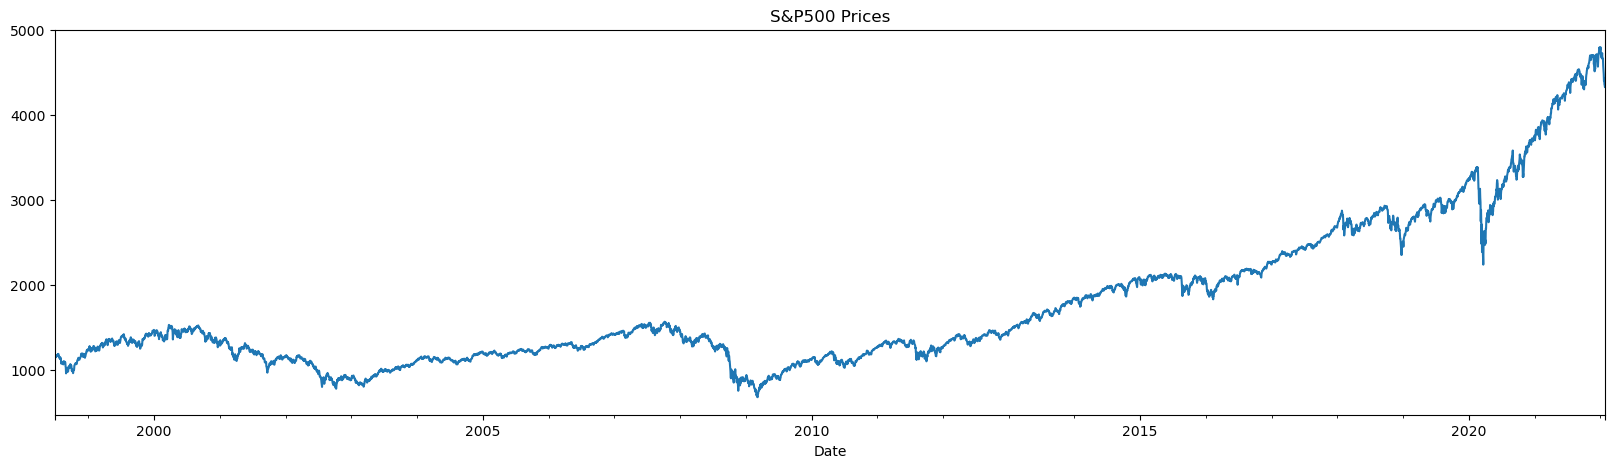

In [221]:
df_comp.spx.plot(figsize = (20,5), title = "S&P500 Prices")
plt.show()

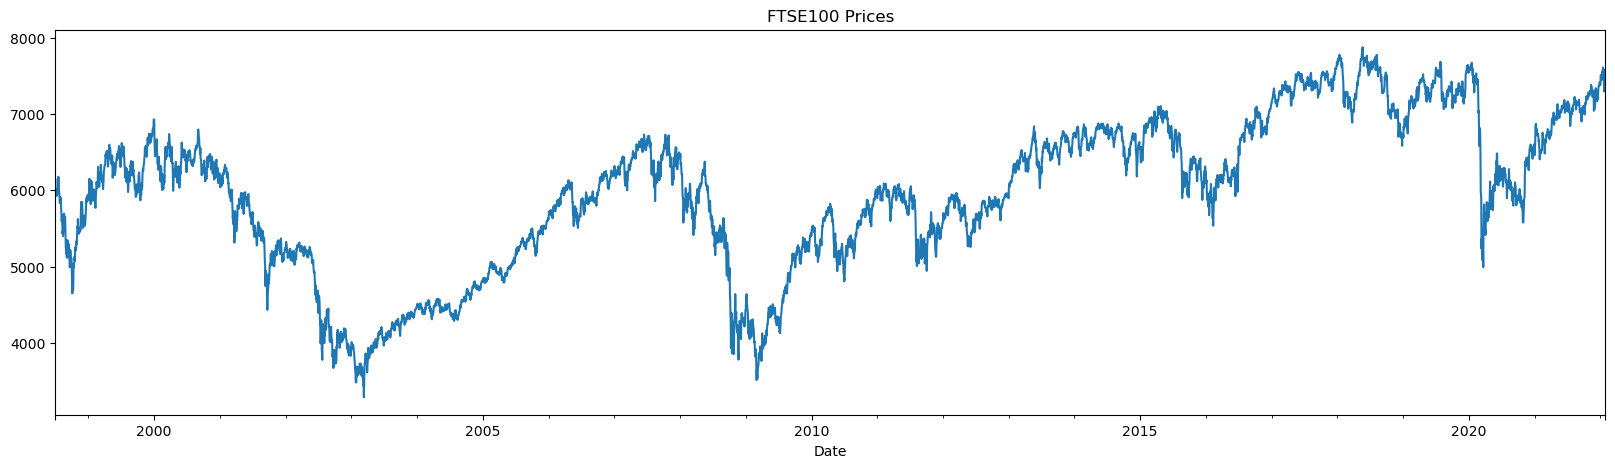

In [222]:
df_comp.ftse.plot(figsize = (20,5), title = "FTSE100 Prices")
plt.show()

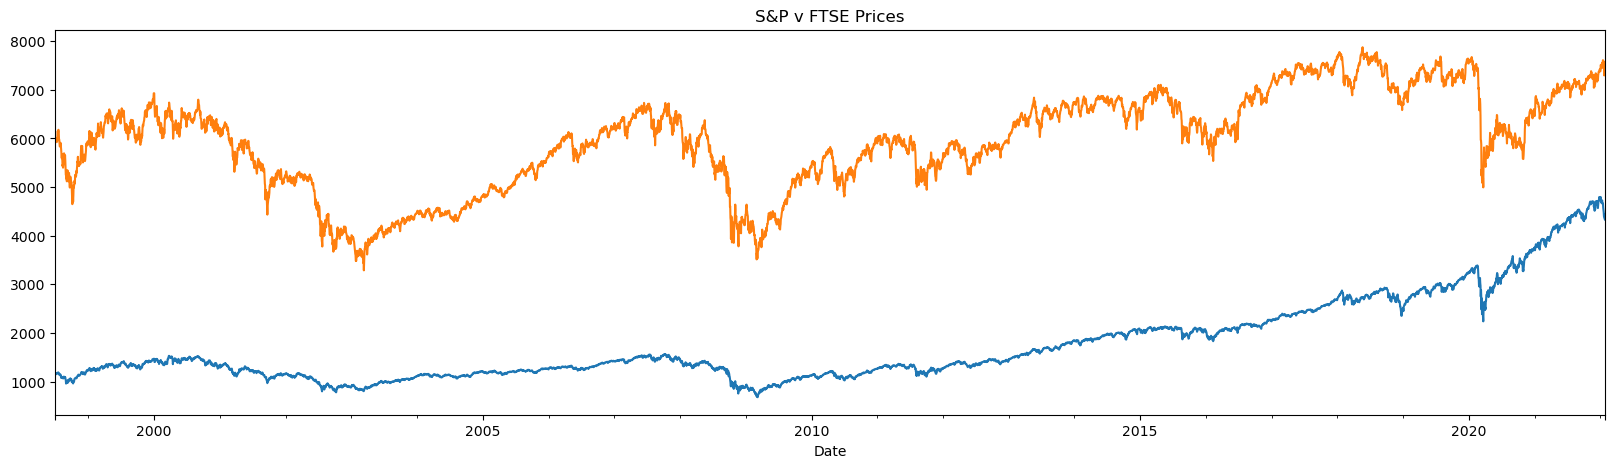

In [223]:
df_comp.spx.plot(figsize = (20,5), title = "S&P500 Prices")
df_comp.ftse.plot(figsize = (20,5), title = "FTSE100 Prices")
plt.title("S&P v FTSE Prices")
plt.show()

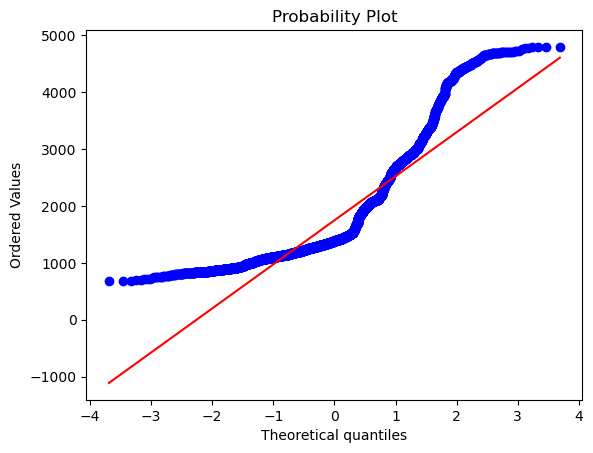

In [224]:
scipy.stats.probplot(df_comp.spx, plot = pylab)
pylab.show()

Splitting data

In [225]:
size = int(len(df_comp)*0.8)
df = df_comp.iloc[:size]
df_test = df_comp.iloc[size:]

In [226]:
df.tail()

,spx,dax,ftse,nikkei
Date,,,,
2017-05-05,2399.290039,12716.889648,7297.399902,19445.699219
2017-05-08,2399.379883,12694.549805,7300.899902,19895.699219
2017-05-09,2396.919922,12749.120117,7342.200195,19843.000000
2017-05-10,2399.629883,12757.459961,7385.200195,19900.089844
2017-05-11,2394.439941,12711.059570,7386.600098,19961.550781


In [227]:
df_test.head()

,spx,dax,ftse,nikkei
Date,,,,
2017-05-12,2390.899902,12770.410156,7435.399902,19883.900391
2017-05-15,2402.320068,12807.040039,7454.399902,19869.849609
2017-05-16,2400.669922,12804.530273,7522.000000,19919.820312
2017-05-17,2357.030029,12631.610352,7503.500000,19814.880859
2017-05-18,2365.719971,12590.059570,7436.399902,19553.859375


White noise

In [228]:
df["wn"] = np.random.normal(loc = df.spx.mean(), scale = df.spx.std(), size = len(df))

C:\Users\Alessandro\AppData\Local\Temp\ipykernel_17144\3169511016.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["wn"] = np.random.normal(loc = df.spx.mean(), scale = df.spx.std(), size = len(df))


Text(0.5, 1.0, 'SP500 v White noise')

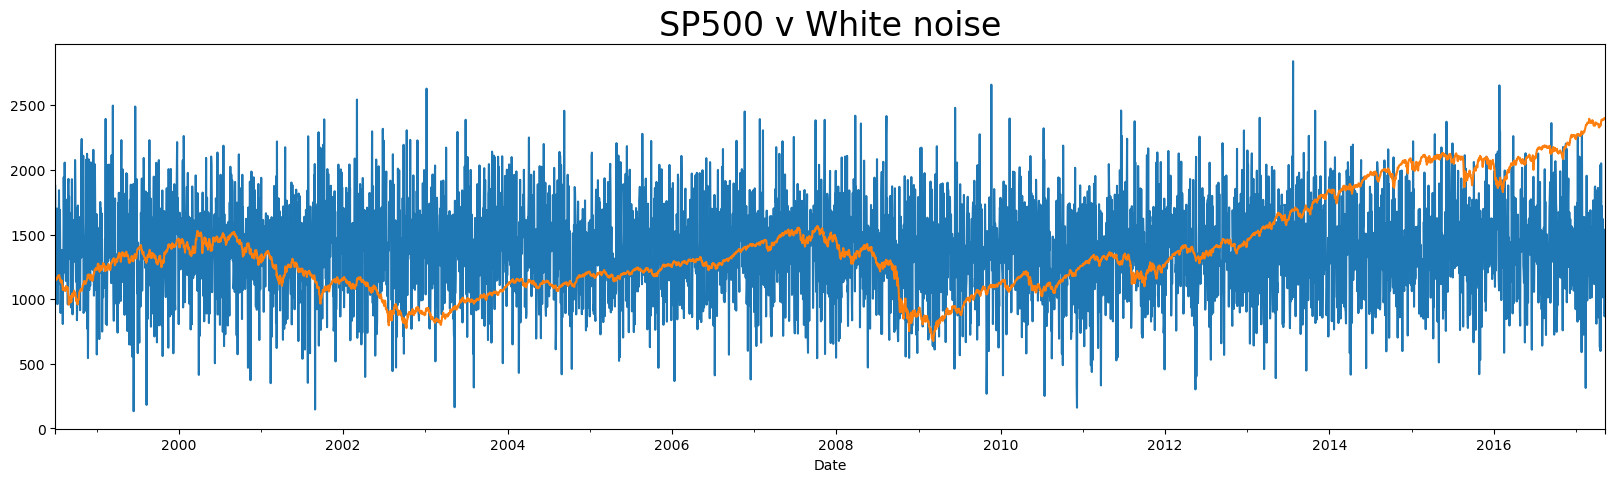

In [229]:
df.wn.plot(figsize = (20,5))
df.spx.plot(figsize = (20,5))
plt.title("SP500 v White noise", size = 24)

Random walk

In [230]:
rw = pd.read_csv("RandWalk.csv")
rw.date = pd.to_datetime(rw.date, dayfirst = True)
rw.set_index("date", inplace = True)
rw = rw.asfreq("b")

In [231]:
rw.tail()

,price
date,
2013-04-01,2263.675474
2013-04-02,2225.000870
2013-04-03,2190.787688
2013-04-04,2195.240033
2013-04-05,2152.992143


In [232]:
df["rw"] = rw.price

C:\Users\Alessandro\AppData\Local\Temp\ipykernel_17144\3989722725.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["rw"] = rw.price


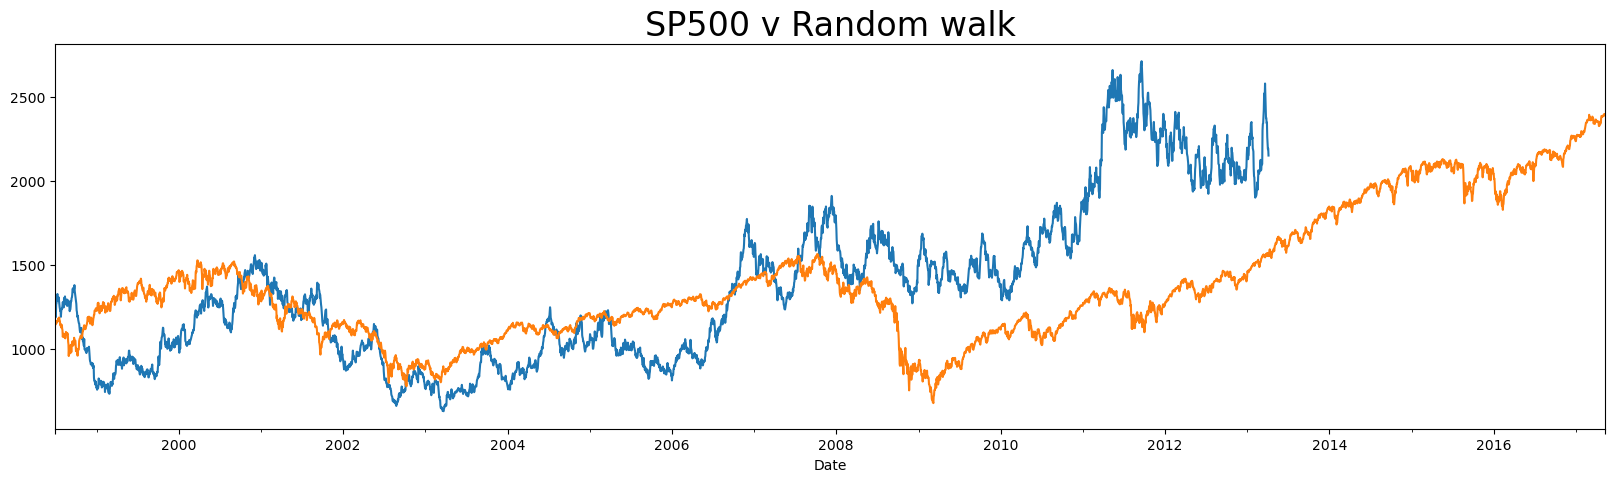

In [233]:
df.rw.plot()
df.spx.plot(figsize = (20,5))
plt.title("SP500 v Random walk", size = 24)
plt.show()

### Covariance stationarity

* Constant mean
* Constant variance
* Covariance consistent per shift of periods

Verifiable through Dikey-Fuller test

In [234]:
sts.adfuller(df.spx)

(0.42059625823168967,
 0.9822490408007652,
 9,
 4912,
 {'1%': -3.4316819871004602,
  '5%': -2.862128591944256,
  '10%': -2.567083308604402},
 40232.31257945794)

Since our test statistic is greater than all the significance levels we cannot conclude that our process is stationary

In [235]:
sts.adfuller(df.wn)

(-69.61719471301357,
 0.0,
 0,
 4921,
 {'1%': -3.431679549761321,
  '5%': -2.8621275151488854,
  '10%': -2.5670827353828365},
 71612.18377783333)

White noise is stationary

### Seasonality

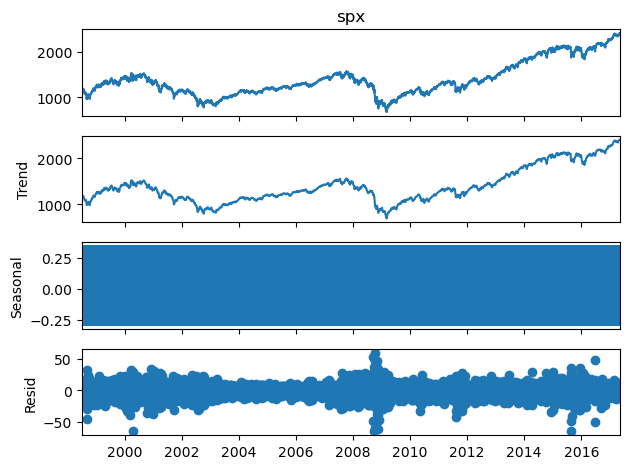

In [236]:
s_dec_add = seasonal_decompose(df.spx, model = "additive")
s_dec_add.plot()
plt.show()

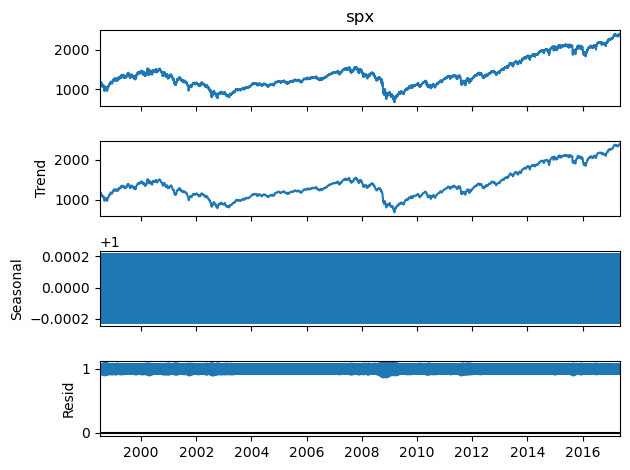

In [237]:
s_dec_mul = seasonal_decompose(df.spx, model = "multiplicative")
s_dec_mul.plot()
plt.show()

### Autocorrelation

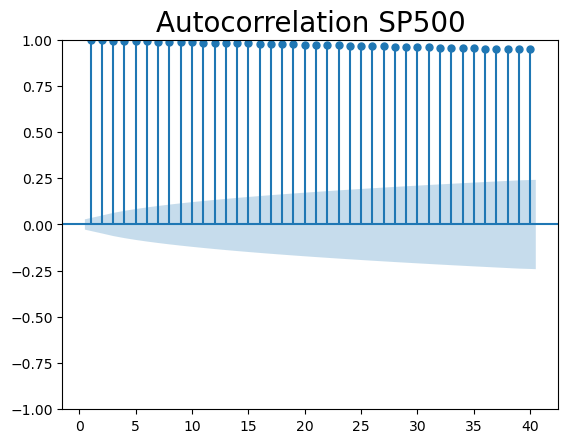

In [238]:
sgt.plot_acf(df.spx, lags = 40, zero = False)
plt.title("Autocorrelation SP500", size = 20)
plt.show()

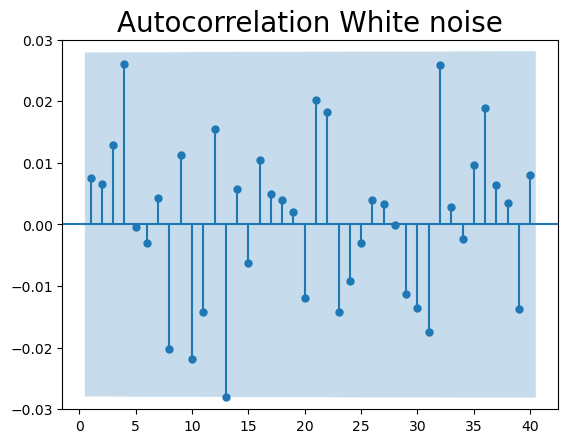

In [239]:
sgt.plot_acf(df.wn, lags = 40, zero = False)
plt.title("Autocorrelation White noise", size = 20)
plt.ylim((-0.03,0.03))
plt.show()

### Partial autocorrelation

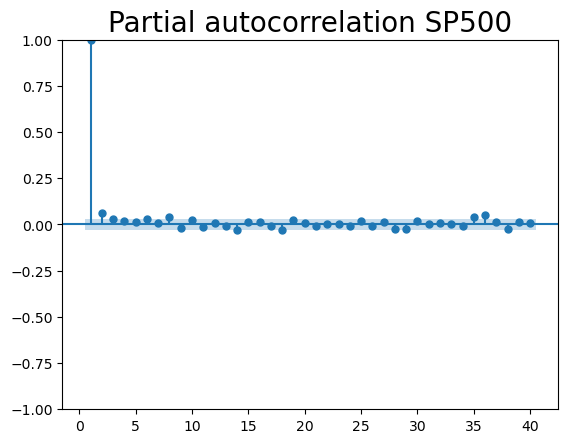

In [240]:
sgt.plot_pacf(df.spx, lags = 40, zero = False, method = ("ols"))
plt.title("Partial autocorrelation SP500", size = 20)
plt.show()

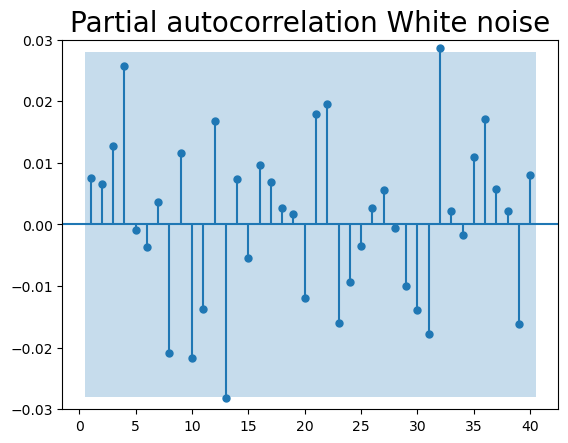

In [241]:
sgt.plot_pacf(df.wn, lags = 40, zero = False, method = ("ols"))
plt.title("Partial autocorrelation White noise", size = 20)
plt.ylim((-0.03,0.03))
plt.show()